**Problem 1**

In [1]:
%reset -f
from functions import *

l = sp.Integer(200)
h = sp.Integer(400)

theta = 60
d = h
a = sp.sqrt(l**2 - (l/2)**2)
alpha = -90

print(f"theta, d, a, alpha = {theta, d, a, alpha} \n")

T = transformation_from_denavit_hartenberg([[theta, d, a, alpha]], deg=True)
print("Transformation matrix:")
display(T)
display(T.evalf(3))

theta, d, a, alpha = (60, 400, 100*sqrt(3), -90) 

Transformation matrix:


Matrix([
[      1/2,  0, -sqrt(3)/2, 50*sqrt(3)],
[sqrt(3)/2,  0,        1/2,        150],
[        0, -1,          0,        400],
[        0,  0,          0,          1]])

Matrix([
[  0.5,    0, -0.866,  86.6],
[0.866,    0,    0.5, 150.0],
[    0, -1.0,      0, 400.0],
[    0,    0,      0,   1.0]])

**Problem 2**

In [ ]:
%reset -f
from functions import *

t = sp.symbols('t', real = True, positive = True)
theta1, d2, theta3, theta4 = [sp.Function(name)(t) for name in ['theta1', 'd2', 'theta3', 'theta4']]

DH_list = [[theta1,100,0,pi/2],
           [pi/2,d2,0,pi/2],
           [theta3,0,60,pi/2],
           [theta4,0,0,pi/2]]

print('Denavit-Hartenberg parameters:')
display(sp.Matrix(DH_list))

values = {theta1:135/180*pi, d2:200, theta3:pi/4, theta4:-pi/3}

T = transformation_from_denavit_hartenberg(DH_list)
print(f"Transformation matrix with: theta1, d2, theta3, theta4 = {list(values.values())}")
display(T.evalf(4,subs=values))

Jacobian = Jacobian_from_denavit_hartenberg(DH_list)
print('Jacobian matrix:')
display(Jacobian.evalf(4,subs=values))

q_dot = sp.Matrix([0.0025*pi , 0 , 0 , 0])
v_omega = Jacobian*q_dot
print('Linear and angular velocity [vx,vy,vz,wx,wy,wz]:')
display(v_omega.evalf(4,subs=values))

Denavit-Hartenberg parameters:


Matrix([
[theta1(t),   100,  0, pi/2],
[     pi/2, d2(t),  0, pi/2],
[theta3(t),     0, 60, pi/2],
[theta4(t),     0,  0, pi/2]])

Transformation matrix with: theta1, d2, theta3, theta4 = [0.75*pi, 200, pi/4, -pi/3]


Matrix([
[ 0.8624,   -0.5, -0.07946, 171.4],
[-0.3624,   -0.5,  -0.7866, 171.4],
[ 0.3536, 0.7071,  -0.6124, 142.4],
[      0,      0,        0,   1.0]])

Jacobian matrix:


Matrix([
[-171.4,   30.0,    30.0,      0],
[ 171.4,  -30.0,    30.0,      0],
[     0,      0,  -42.43,      0],
[     0, 0.7071, -0.7071,   -0.5],
[     0, 0.7071,  0.7071,   -0.5],
[   1.0,      0,       0, 0.7071]])

Linear and angular velocity [vx,vy,vz,wx,wy,wz]:


Matrix([
[  -1.346],
[   1.346],
[       0],
[       0],
[       0],
[0.007854]])

**Problem 3**

Jerk:


2*pi*a_max*cos(2*pi*t/t_a)/t_a

Acceleration:


a_max*sin(2*pi*t/t_a)

Velocity:


-a_max*t_a*cos(2*pi*t/t_a)/(2*pi) + a_max*t_a/(2*pi)

Position:


a_max*t*t_a/(2*pi) - a_max*t_a**2*sin(2*pi*t/t_a)/(4*pi**2)


Acceleration and time to reach a distance of 0.03 m:


0.0138546263500235

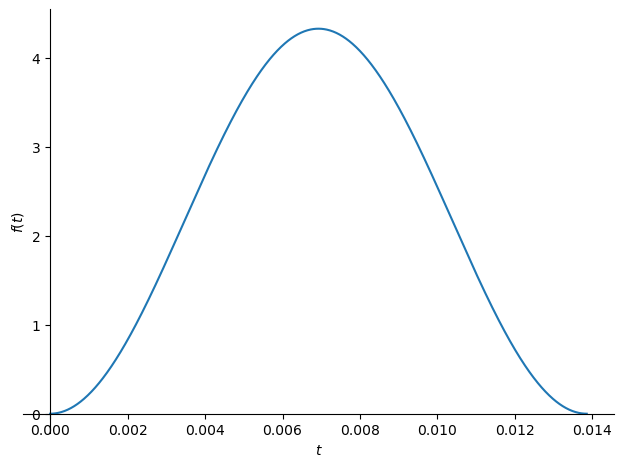

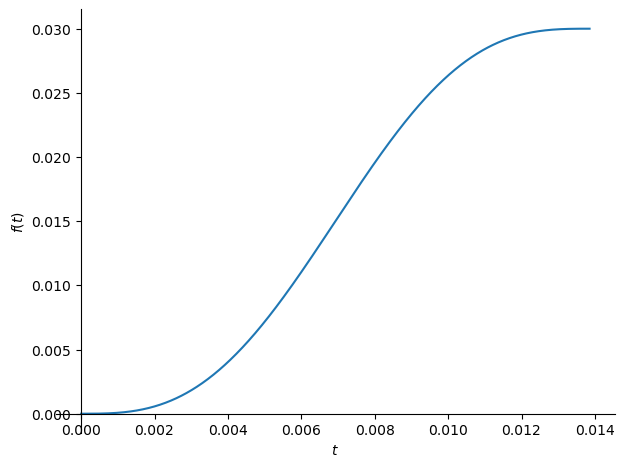

In [38]:
%reset -f
from functions import *

a_max= sp.symbols('a_max', real = True)
t_a = sp.symbols('t_a', real = True, positive = True)

C1, C2 = sp.symbols('C1 C2', real = True)

t = sp.symbols('t', real = True, positive = True)
a = a_max*sp.sin(2*sp.pi*t/t_a)
j = a.diff(t)
v = a.integrate(t) + C1
x = v.integrate(t) + C2

C1_val = sp.solve(v.subs(t,0)-0,C1)[0]
C2_val = sp.solve(x.subs(t,0)-0,C2)[0]

v = v.subs({C1:C1_val,C2:C2_val})
x = x.subs({C1:C1_val,C2:C2_val})

print("Jerk:")
display(j)
print("Acceleration:")
display(a)
print("Velocity:")
display(v.subs(C1,C1_val))
print("Position:")
display(x)

s_a = 0.03

eq1 = sp.Eq(x.subs(t,t_a),s_a)
eq2 = sp.Eq(a_max , 100*9.82)
a_max_sol, t_a_sol = sp.solve([eq1,eq2],(a_max,t_a))[0]

print(f"\nAcceleration and time to reach a distance of {s_a} m:")
display(t_a_sol)

p1 = sp.plot(( v.subs({a_max:a_max_sol,t_a:t_a_sol}) , (t,0,t_a_sol) ), show=True)
p2 = sp.plot(( x.subs({a_max:a_max_sol,t_a:t_a_sol}) , (t,0,t_a_sol) ), show=True)



**Problem 4**

In [45]:
%reset -f
from functions import *


def transformation_matrix_from_3_points(P0, Px, Py):
    # P0: The origin, Px: A point on the x-axis, Py: A point in the xy-plane
    x = (Px - P0).normalized()
    y = (Py - P0).normalized()

    T = sp.eye(4)
    T[:3,0] = x
    T[:3,2] = x.cross(y).normalized()
    T[:3,1] = T[:3,2].cross(x)
    T[:3,3] = P0
    return T.evalf(4)

P0 = sp.Matrix([0.2500, 0.2500, 0.150])
Px = sp.Matrix([0.4526, 0.3357, 0.150])
Py = sp.Matrix([0.0942, 0.6184, 0.150])

T1 = transformation_matrix_from_3_points(P0, Px, Py)
print("Transformation matrix:")
display(T1)

P0 = sp.Matrix([0.4000, 0.2000, 0.150])
Px = sp.Matrix([0.6388, 0.2240, 0.150])
Py = sp.Matrix([0.5321, 0.2903, 0.150])

T2 = transformation_matrix_from_3_points(P0, Px, Py)
print("Transformation matrix:")
display(T2)



Transformation matrix:


Matrix([
[ 0.921, -0.3896,   0, 0.25],
[0.3896,   0.921,   0, 0.25],
[     0,       0, 1.0, 0.15],
[     0,       0,   0,  1.0]])

Transformation matrix:


Matrix([
[0.995,  -0.1,   0,  0.4],
[  0.1, 0.995,   0,  0.2],
[    0,     0, 1.0, 0.15],
[    0,     0,   0,  1.0]])

Matrix([
[0.05*t1],
[      0],
[     t1],
[      1]])

Matrix([
[0.1 - 0.05*t2],
[            0],
[           t2],
[            1]])

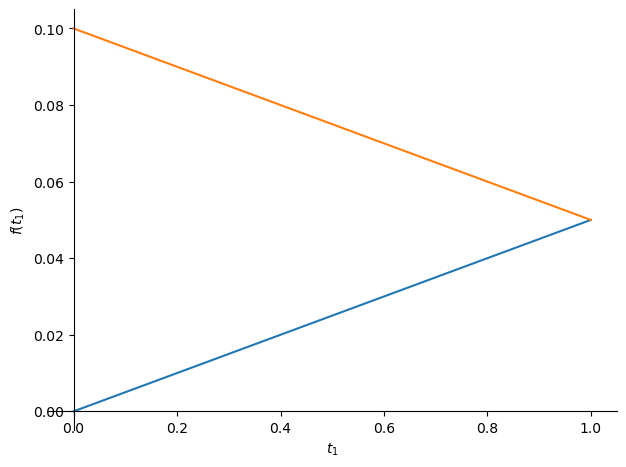

Matrix([
[0.45],
[ 0.2],
[   0],
[   1]])

In [ ]:
%reset -f
from functions import *
x, y, z = sp.symbols('x y z', real = True)
t1, t2 = sp.symbols('t1 t2', real = True)

lamb = 1
B = 0.1

T12 = sp.eye(4)
T12[0,3] = B

oc1 = sp.Matrix([0 , 0 , 0,1])
oc2 = T12 * sp.Matrix([0 , 0 , 0 , 1])

uv1 = sp.Matrix([0.05 , 0 , 1, 1])
uv2 = T12*sp.Matrix([-0.05 , 0 , 1, 1])

#uv1[2] = sp.sqrt(lamb**2 - uv1[0]**2 - uv1[1]**2)
#uv2[2] = sp.sqrt(lamb**2 - uv2[0]**2 - uv2[1]**2)

line1 = oc1 + t1*(uv1 - oc1)
line2 = oc2 + t2*(uv2 - oc2)

sol = sp.solve(line1-line2, [t1,t2])
display(line1)
display(line2)

p1 = sp.plot((line1[0],(t1,0,1)), show=False)
p2 = sp.plot((line2[0],(t2,0,1)), show=False)
p1.extend(p2)
p1.show()


Tb1 = sp.Matrix([[1,0,0,0.4],
                  [0,-1,0,0.2],
                  [0,0,-1,1],
                  [0,0,0,1]])
Pb = Tb1*line1.subs(sol)
display(Pb)


**Problem 5**

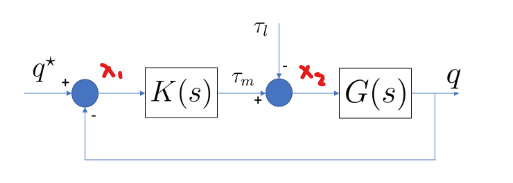

In [105]:
%reset -f
from functions import *

s = sp.symbols('s')
tau_l, tau_m, q_star, q, K, G = sp.symbols('tau_l tau_m q_star q K G')
x1, x2 = sp.symbols('x1 x2')

#G = 1/(0.2*s**2+0.8*s)
#kp, ki = 0.5, 0.1
#K = kp + ki/s

eq1 = sp.Eq(x1 , q_star - q)
eq2 = sp.Eq(x2 , x1*K*tau_m - tau_l)
eq3 = sp.Eq(q , G*x2)

sol = sp.solve([eq1,eq2,eq3],(x1,x2,q))
display(sol[q])

(G*K*q_star*tau_m - G*tau_l)/(G*K*tau_m + 1)